# Analisi dei risultati delle run
In questo Notebook si analizzano i risultati ottenuti dalle 4 run:
<ul>
    <li>Modello TF-IDF</li>
    <li>Porter Stemmer con Modello BM25</li>
    <li>Rimozione StopWords+Porter Stemmer con Modello TF-IDF</li>
    <li>Rimozione StopWords+Porter Stemmer con Modello BM25</li>
</ul>
Vengono utilizzati i file <i>.eval</i> ottenuti valutando le run con il sistema di IR Terrierv5.0 analizzando MAP, RPrec e Precision at 10.
Si analizzano prima i file <i>.eval</i> risultanti utilizzando nel file <i>terrier.properties</i> il valore

#### TrecQueryTags.process=TITLE,DESC

e successivamente il valore

#### TrecQueryTags.process=TITLE
________________________________________________________________________________________________________________

# ---------------------------------------------------------------------------------------------------------
## TrecQueryTags.process=TITLE,DESC

Si inizia indicando la cartella contenente i file <i>.eval</i> 

In [1]:
#path of the .eval files
path="Evaluation/"

Si importano tutte le librerie utili

In [2]:
#import all the libraries
from smart_open import smart_open  #for open the .eval files
from os import listdir             #for listing the file in a directory
import numpy                       #for array and matrix
import matplotlib.pyplot as plt    #for the plots
from scipy import stats            #for statistic analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from tabulate import tabulate

Si crea una lista contenente tutti i file <i>.eval</i> presenti nella directory specificata

In [3]:
eval_docs=[]
for file in listdir(path):
    if file.find("eval")!=-1:
        eval_docs.append(file)
print(eval_docs)

['Only_TF_IDF.eval', 'Stemmer_BM25.eval', 'Stop_Stem_BM25.eval', 'Stop_Stem_TF_IDF.eval']


Funzione che estrae i valori di Average Precision per ogni query nel file .eval specificato 

In [4]:
def ap_extractor(eval_file_path):
    ap_array=[]
    #open file
    open_file=smart_open(eval_file_path, 'rb', encoding='utf8')
    for line in open_file:
        #take only the ap value of the queries and not the mean of all queries
        if(line.split()[0]=="map") and (line.split()[1]!="all"):
            ap_array.append(float(line.split()[2]))
    return ap_array

Si crea un istogramma con i valori di Average Precision delle varie query.


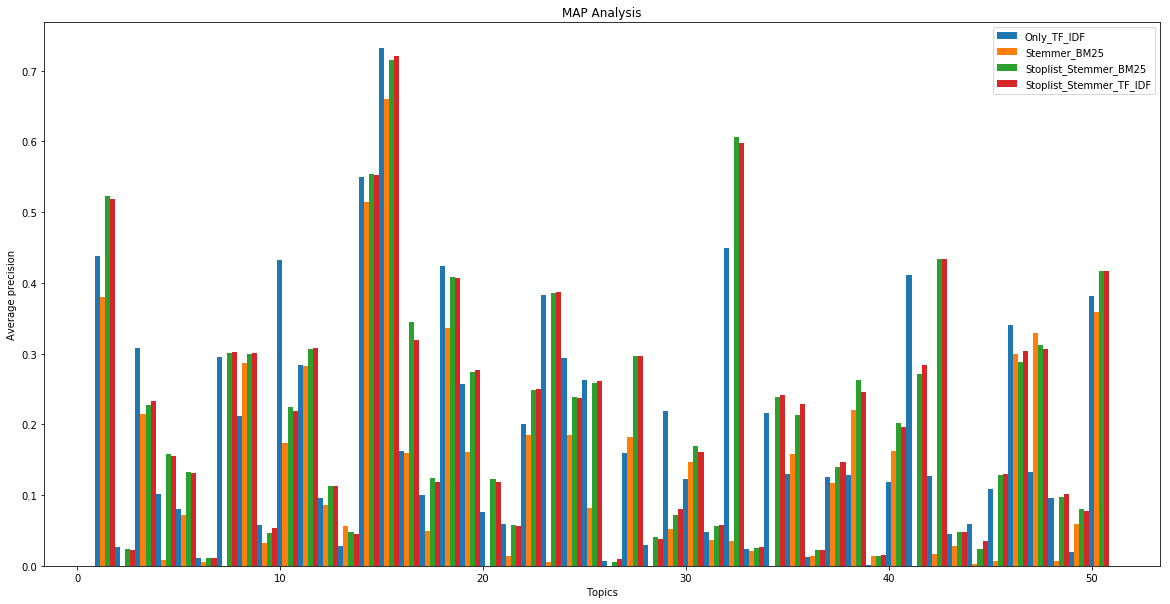

In [5]:
#extract the ap values for every run
for doc in eval_docs:
    if doc.find("Only_TF_IDF")!=-1:
        ap_Only_TF_IDF=ap_extractor(path+doc)
    elif doc.find("Stemmer_BM25")!=-1:
        ap_Stemmer_BM25=ap_extractor(path+doc)
    elif doc.find("Stop_Stem_BM25")!=-1:
        ap_Stop_Stem_BM25=ap_extractor(path+doc)
    elif doc.find("Stop_Stem_TF_IDF")!=-1:
        ap_Stop_Stem_TF_IDF=ap_extractor(path+doc)

#initialize a vector from 1 to 50 because there are 50 queries so 50 bins in the istogram
bins = numpy.arange(1, 51)
#width of the bins
width=0.25
fig_ap = plt.figure(figsize=(20,10))
sub_ap = fig_ap.add_subplot(1,1,1)
sub_ap.bar(bins, ap_Only_TF_IDF, width, label='Only_TF_IDF')
sub_ap.bar(bins+width, ap_Stemmer_BM25, width, label='Stemmer_BM25')
sub_ap.bar(bins+width*2, ap_Stop_Stem_BM25, width, label='Stoplist_Stemmer_BM25')
sub_ap.bar(bins+width*3, ap_Stop_Stem_TF_IDF, width, label='Stoplist_Stemmer_TF_IDF')
plt.xlabel('Topics')
plt.ylabel('Average precision')
plt.title('MAP Analysis')
plt.legend()
plt.savefig('ap_istogram.png')

Facendo la media dei valori si ha una visione generale dell'andamento dei valori di ap delle run. In questo caso la media dei valori di ap è proprio il valore di Map. I valori vengono mostrati in un grafico a barre.

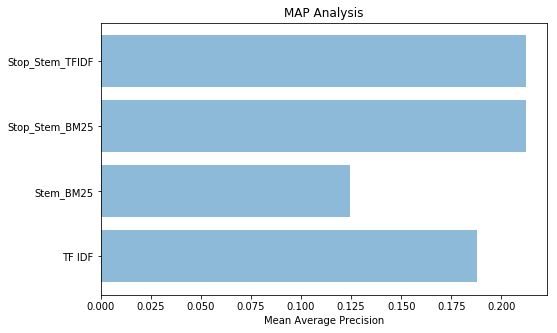

In [6]:
#mean of the average precision values
map_only_TF_IDF=sum(ap_Only_TF_IDF)/50
map_Stemmer_BM25=sum(ap_Stemmer_BM25)/50
map_Stoplist_Stemmer_BM25=sum(ap_Stop_Stem_BM25)/50
map_Stoplist_Stemmer_TF_IDF=sum(ap_Stop_Stem_TF_IDF)/50
y_pos=numpy.arange(4)
x=["TF IDF", "Stem_BM25","Stop_Stem_BM25", "Stop_Stem_TFIDF" ]

plt.figure(figsize=(8,5))
plt.barh(y_pos,[map_only_TF_IDF, map_Stemmer_BM25, map_Stoplist_Stemmer_BM25, 
                map_Stoplist_Stemmer_TF_IDF], align='center',alpha=0.5)
plt.yticks(y_pos, x)
plt.xlabel('Mean Average Precision')
plt.title('MAP Analysis')
plt.savefig('map_bars.png')

Funzione che estrae i valori di RPrec dai file <i>.eval</i>

In [7]:
def rprec_extractor(eval_file_path):
    rprec_array=[]
    open_file=smart_open(eval_file_path, 'rb', encoding='utf8')
    for line in open_file:
        if(line.split()[0]=="Rprec") and (line.split()[1]!="all"):
            rprec_array.append(float(line.split()[2]))
    return rprec_array

Si crea l'istogramma dei valori di RPrec estratti per ogni run.

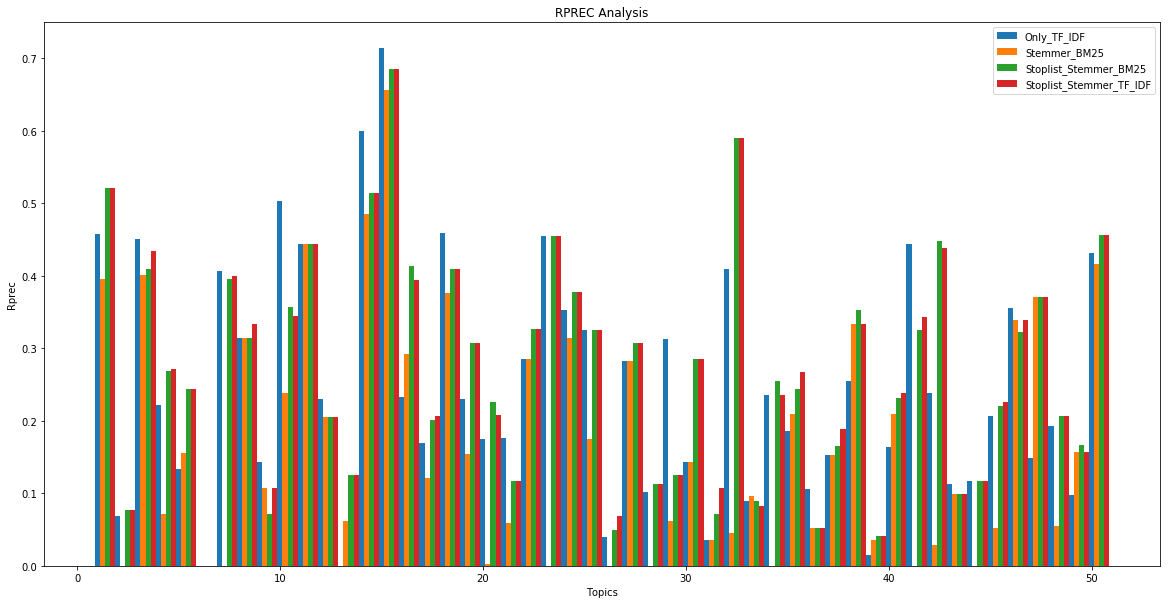

In [8]:
for doc in eval_docs:
    if doc.find("Only_TF_IDF")!=-1:
        rprec_Only_TF_IDF=rprec_extractor(path+doc)
    elif doc.find("Stemmer_BM25")!=-1:
        rprec_Stemmer_BM25=rprec_extractor(path+doc)
    elif doc.find("Stop_Stem_BM25")!=-1:
        rprec_Stop_Stem_BM25=rprec_extractor(path+doc)
    elif doc.find("Stop_Stem_TF_IDF")!=-1:
        rprec_Stop_Stem_TF_IDF=rprec_extractor(path+doc)

bins = numpy.arange(1, 51)
width=0.25
fig_rp = plt.figure(figsize=(20,10))
sub_rp = fig_rp.add_subplot(1,1,1)
sub_rp.bar(bins, rprec_Only_TF_IDF, width, label='Only_TF_IDF')
sub_rp.bar(bins+width, rprec_Stemmer_BM25, width, label='Stemmer_BM25')
sub_rp.bar(bins+width*2, rprec_Stop_Stem_BM25, width, label='Stoplist_Stemmer_BM25')
sub_rp.bar(bins+width*3, rprec_Stop_Stem_TF_IDF, width, label='Stoplist_Stemmer_TF_IDF')
plt.xlabel('Topics')
plt.ylabel('Rprec')
plt.title('RPREC Analysis')
plt.legend()
plt.savefig('rprec_istogram.png')

Si calcola la media dei valori di RPrec per ogni run e si mostra in un grafico a barre.

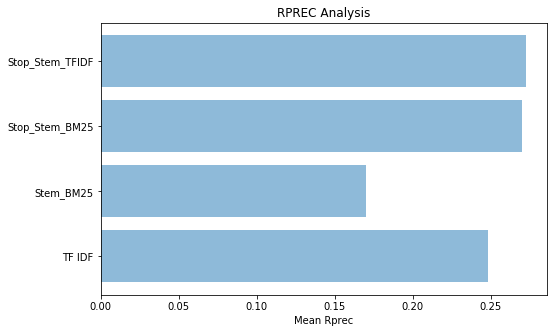

In [9]:
mrprec_only_TF_IDF=sum(rprec_Only_TF_IDF)/50
mrprec_Stemmer_BM25=sum(rprec_Stemmer_BM25)/50
mrprec_Stoplist_Stemmer_BM25=sum(rprec_Stop_Stem_BM25)/50
mrprec_Stoplist_Stemmer_TF_IDF=sum(rprec_Stop_Stem_TF_IDF)/50

y_pos=numpy.arange(4)
x=["TF IDF", "Stem_BM25","Stop_Stem_BM25", "Stop_Stem_TFIDF" ]
plt.figure(figsize=(8,5))
plt.barh(y_pos,[mrprec_only_TF_IDF, mrprec_Stemmer_BM25, mrprec_Stoplist_Stemmer_BM25, 
                mrprec_Stoplist_Stemmer_TF_IDF], align='center',alpha=0.5)
plt.yticks(y_pos, x)
plt.xlabel('Mean Rprec')
plt.title('RPREC Analysis')
plt.savefig('rprec_bars.png')

Funzione che estrae i valori di Precision at 10 dai file <i>.eval</i> 

In [10]:
def prec10_extractor(eval_file_path):
    prec10_array=[]
    open_file=smart_open(eval_file_path, 'rb', encoding='utf8')
    for line in open_file:
        if(line.split()[0]=="P_10") and (line.split()[1]!="all"):
            prec10_array.append(float(line.split()[2]))
    return prec10_array

Istogramma dei valori di Precision at 10 per ogni run

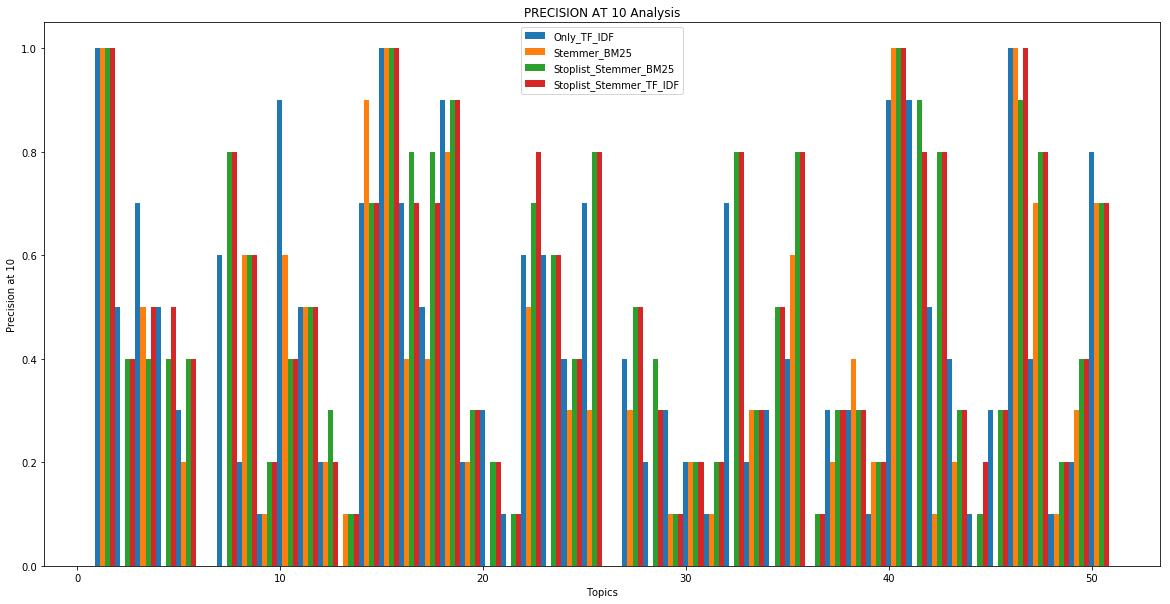

In [11]:
for doc in eval_docs:
    if doc.find("Only_TF_IDF")!=-1:
        prec10_Only_TF_IDF=prec10_extractor(path+doc)
    elif doc.find("Stemmer_BM25")!=-1:
        prec10_Stemmer_BM25=prec10_extractor(path+doc)
    elif doc.find("Stop_Stem_BM25")!=-1:
        prec10_Stop_Stem_BM25=prec10_extractor(path+doc)
    elif doc.find("Stop_Stem_TF_IDF")!=-1:
        prec10_Stop_Stem_TF_IDF=prec10_extractor(path+doc)

bins = numpy.arange(1, 51)
width=0.25
fig_p10 = plt.figure(figsize=(20,10))
sub_p10 = fig_p10.add_subplot(1,1,1)
sub_p10.bar(bins, prec10_Only_TF_IDF, width, label='Only_TF_IDF')
sub_p10.bar(bins+width, prec10_Stemmer_BM25, width, label='Stemmer_BM25')
sub_p10.bar(bins+width*2, prec10_Stop_Stem_BM25, width, label='Stoplist_Stemmer_BM25')
sub_p10.bar(bins+width*3, prec10_Stop_Stem_TF_IDF, width, label='Stoplist_Stemmer_TF_IDF')
plt.xlabel('Topics')
plt.ylabel('Precision at 10')
plt.title('PRECISION AT 10 Analysis')
plt.legend()
plt.savefig('p10_istogram.png')

Grafico a barre dell'andamento medio dei valori di Precision at 10 per ogni run

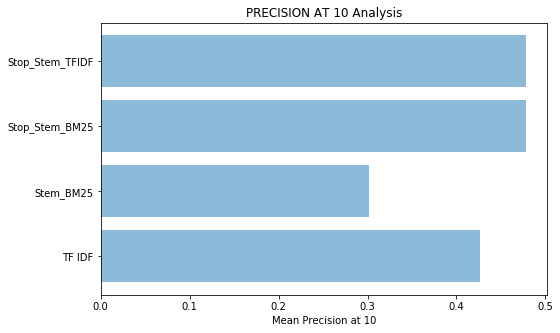

In [12]:
mprec10_only_TF_IDF=sum(prec10_Only_TF_IDF)/50
mprec10_Stemmer_BM25=sum(prec10_Stemmer_BM25)/50
mprec10_Stoplist_Stemmer_BM25=sum(prec10_Stop_Stem_BM25)/50
mprec10_Stoplist_Stemmer_TF_IDF=sum(prec10_Stop_Stem_TF_IDF)/50

y_pos=numpy.arange(4)
plt.figure(figsize=(8,5))
x=["TF IDF", "Stem_BM25","Stop_Stem_BM25", "Stop_Stem_TFIDF" ]
plt.barh(y_pos,[mprec10_only_TF_IDF, mprec10_Stemmer_BM25, mprec10_Stoplist_Stemmer_BM25, 
                mprec10_Stoplist_Stemmer_TF_IDF], align='center',alpha=0.5)
plt.yticks(y_pos, x)
plt.xlabel('Mean Precision at 10')
plt.title('PRECISION AT 10 Analysis')
plt.savefig('p10_bars.png')

Per rendere più chiara la differenza tra i valori trovati, si creano ora i boxplot.

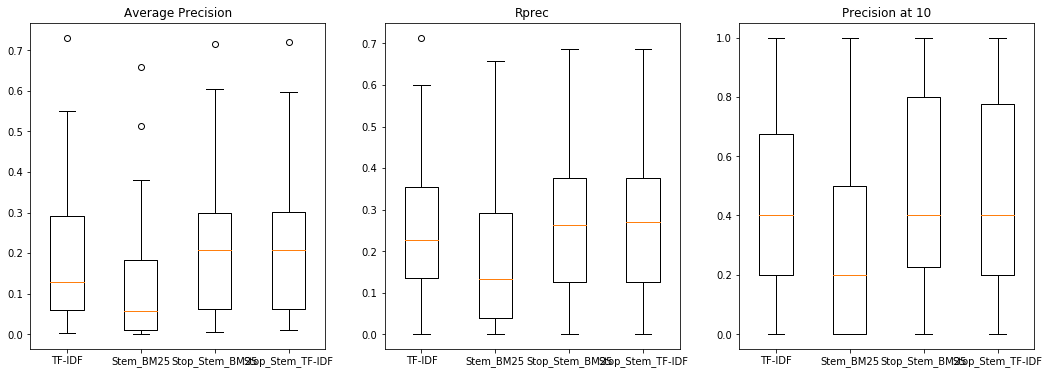

In [13]:
ap_values=[ap_Only_TF_IDF, ap_Stemmer_BM25, ap_Stop_Stem_BM25, ap_Stop_Stem_TF_IDF]
rprec_values=[rprec_Only_TF_IDF, rprec_Stemmer_BM25, rprec_Stop_Stem_BM25, rprec_Stop_Stem_TF_IDF]
p10_values=[prec10_Only_TF_IDF, prec10_Stemmer_BM25, prec10_Stop_Stem_BM25, prec10_Stop_Stem_TF_IDF]
lab=["TF-IDF","Stem_BM25","Stop_Stem_BM25","Stop_Stem_TF-IDF"]
fig_box = plt.figure(figsize=(18,6))
box_ap = fig_box.add_subplot(1,3,1)
box_ap.boxplot(ap_values, labels=lab)
box_ap.set_title("Average Precision")
box_rp = fig_box.add_subplot(1,3,2)
box_rp.boxplot(rprec_values, labels=lab)
box_rp.set_title("Rprec")
box_p10 = fig_box.add_subplot(1,3,3)
box_p10.boxplot(p10_values, labels=lab)
box_p10.set_title("Precision at 10")
plt.savefig('boxplot.png')

Si svolge il test ANOVA 1-way per determinare i valori appartenenti al top group.

In [14]:
ap_F_value, ap_P_value=stats.f_oneway(ap_Only_TF_IDF, ap_Stemmer_BM25, ap_Stop_Stem_BM25, ap_Stop_Stem_TF_IDF)
rp_F_value, rp_P_value=stats.f_oneway(rprec_Only_TF_IDF, rprec_Stemmer_BM25, rprec_Stop_Stem_BM25, rprec_Stop_Stem_TF_IDF)
p10_F_value, p10_P_value=stats.f_oneway(prec10_Only_TF_IDF, prec10_Stemmer_BM25, prec10_Stop_Stem_BM25, prec10_Stop_Stem_TF_IDF)

print("Values", '\t\t', "Average Precision", '\t', "Rprec", '\t\t\t',"Precision at 10")
print("-------",'\t',"-----------------", '\t', "-----", '\t\t\t', "---------------")
print("F-Values", '\t', ap_F_value, '\t', rp_F_value, '\t',p10_F_value)
print("P-Values", '\t', ap_P_value, '\t', rp_P_value, '\t',p10_P_value)

#save results in a file
file=open("Anova_TITLE,DESC.txt","w")
file.write("ANOVA 1-way test per TITLE,DESC \n")
file.write("Values \t\t Average Precision \t Rprec \t\t\t Precision at 10 \n")
file.write("------- \t -----------------  \t -----  \t\t --------------- \n")
file.write("F-Values \t"+ str(ap_F_value)+" \t" +str(rp_F_value)+" \t"+str(p10_F_value)+"\n")
file.write("P-Values \t"+str(ap_P_value)+ "\t"+str(rp_P_value)+ "\t"+str(p10_P_value)+"\n")
file.close()

Values 		 Average Precision 	 Rprec 			 Precision at 10
------- 	 ----------------- 	 ----- 			 ---------------
F-Values 	 3.2841616848567314 	 4.573577844124395 	 3.7921904932950197
P-Values 	 0.02191547857148623 	 0.004039540757686881 	 0.01126635707918933


I P-Values del test ANOVA 1-way sono tutti minori di 0.05, quindi si esegue il test di Tukey hsd per conoscere quale run ha una media minore rispetto alle altre.

In [15]:
#we have 200 queries, 50 foreach run, so we create a list
#with the name of the run foreach query to use the Multicomparison method
group=[]
for i in range(1,201):
    if i<51:
        group.append("Only TF-IDF")
    elif (i<101) & (i>50):
        group.append("Stemmer BM25")
    elif (i<151) & (i>100):
        group.append("Stoplist Stemmer BM25")
    elif i>150:
        group.append("Stoplist Stemmer TF-IDF")
        
#concatenate all the values in a single list foreach kind of value
ap_value=numpy.concatenate((ap_Only_TF_IDF,ap_Stemmer_BM25,ap_Stop_Stem_BM25,ap_Stop_Stem_TF_IDF))
rp_value=numpy.concatenate((rprec_Only_TF_IDF, rprec_Stemmer_BM25, rprec_Stop_Stem_BM25, rprec_Stop_Stem_TF_IDF))
p10_value=numpy.concatenate((prec10_Only_TF_IDF, prec10_Stemmer_BM25, prec10_Stop_Stem_BM25, prec10_Stop_Stem_TF_IDF))
#we do the multicomparison and then we use the tukeyhsd method do perform the test
mc_ap=MultiComparison(ap_value,group)
result_ap=mc_ap.tukeyhsd()
print("Tukey HSD test MAP:")
print(result_ap)
mc_rp=MultiComparison(rp_value,group)
result_rp=mc_rp.tukeyhsd()
print("Tukey HSD test RPrec:")
print(result_rp)
mc_p10=MultiComparison(p10_value,group)
result_p10=mc_p10.tukeyhsd()
print("Tukey HSD test Precision at 10:")
print(result_p10)

#save test results in a file
file=open("Tukey_TITLE,DESC.txt","w")
file.write("Tukey HSD test MAP:\n")
file.write(str(result_ap)+"\n")
file.write("Tukey HSD test RPrec:\n")
file.write(str(result_rp)+"\n")
file.write("Tukey HSD test Precision at 10:\n")
file.write(str(result_p10)+"\n")
file.close()

Tukey HSD test MAP:
             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------------------------------------------------
     Only TF-IDF            Stemmer BM25      -0.0634  -0.1474 0.0206 False 
     Only TF-IDF       Stoplist Stemmer BM25   0.0246  -0.0595 0.1086 False 
     Only TF-IDF      Stoplist Stemmer TF-IDF  0.0246  -0.0594 0.1086 False 
     Stemmer BM25      Stoplist Stemmer BM25   0.088    0.0039 0.172   True 
     Stemmer BM25     Stoplist Stemmer TF-IDF  0.088    0.004  0.172   True 
Stoplist Stemmer BM25 Stoplist Stemmer TF-IDF  0.0001   -0.084 0.0841 False 
----------------------------------------------------------------------------
Tukey HSD test RPrec:
             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------

##### Il test rileva che la run da escludere dal top group è quella che utilizza il Porter Stemmer con il modello BM25.

### -------------------------------------------------------------------------------------------------------------------------------------------

## TrecQueryTags.process=TITLE

Si indica la cartella contenente i file <i>.eval</i> e questi vengono salvati in una lista.

In [16]:
path="Evaluation/OnlyTITLE/"
evalTITLE_docs=[]
for file in listdir(path):
    if file.find("eval")!=-1:
        evalTITLE_docs.append(file)
print(eval_docs)

['Only_TF_IDF.eval', 'Stemmer_BM25.eval', 'Stop_Stem_BM25.eval', 'Stop_Stem_TF_IDF.eval']


Si estraggono utilizzando solo un ciclo tutti i valori necessari per l'esperimento, sfruttando le funzioni scritte in precedenza.
Per differenziare i valori dai precedenti viene aggiunto il suffisso <b>_TITLE</b>

Si mostrano l'istogramma dei valori e successivamente il grafico a barre dei valori medi rispettivamente per MAP, RPrec e Precision at 10.

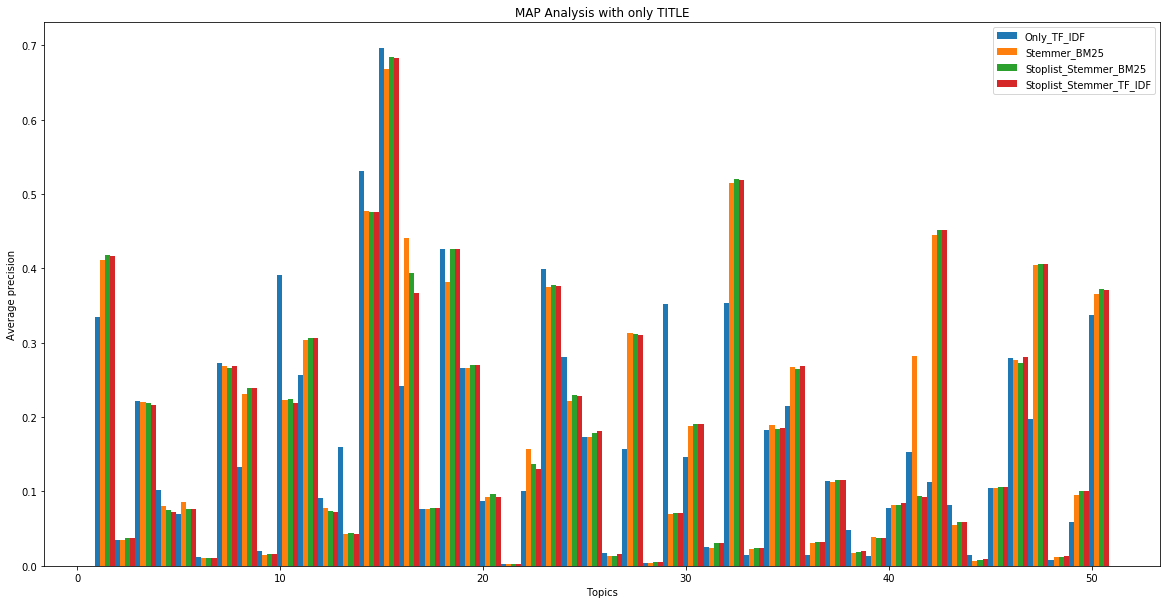

In [17]:
for doc in evalTITLE_docs:
    if doc.find("OnlyTF-IDF_TITLE")!=-1:
        ap_Only_TF_IDF_TITLE=ap_extractor(path+doc)
        rprec_Only_TF_IDF_TITLE=rprec_extractor(path+doc)
        prec10_Only_TF_IDF_TITLE=prec10_extractor(path+doc)
    elif doc.find("StemmerBM25_TITLE")!=-1:
        ap_Stemmer_BM25_TITLE=ap_extractor(path+doc)
        rprec_Stemmer_BM25_TITLE=rprec_extractor(path+doc)
        prec10_Stemmer_BM25_TITLE=prec10_extractor(path+doc)
    elif doc.find("StopStemBM25_TITLE")!=-1:
        ap_Stop_Stem_BM25_TITLE=ap_extractor(path+doc)
        rprec_Stop_Stem_BM25_TITLE=rprec_extractor(path+doc)
        prec10_Stop_Stem_BM25_TITLE=prec10_extractor(path+doc)
    elif doc.find("StopStemTF-IDF_TITLE")!=-1:
        ap_Stop_Stem_TF_IDF_TITLE=ap_extractor(path+doc)
        rprec_Stop_Stem_TF_IDF_TITLE=rprec_extractor(path+doc)
        prec10_Stop_Stem_TF_IDF_TITLE=prec10_extractor(path+doc)

#initialize a vector from 1 to 50 because there are 50 queries so 50 bins in the istogram
bins = numpy.arange(1, 51)
#width of the bins
width=0.25
fig_ap = plt.figure(figsize=(20,10))
sub_ap = fig_ap.add_subplot(1,1,1)
sub_ap.bar(bins, ap_Only_TF_IDF_TITLE, width, label='Only_TF_IDF')
sub_ap.bar(bins+width, ap_Stemmer_BM25_TITLE, width, label='Stemmer_BM25')
sub_ap.bar(bins+width*2, ap_Stop_Stem_BM25_TITLE, width, label='Stoplist_Stemmer_BM25')
sub_ap.bar(bins+width*3, ap_Stop_Stem_TF_IDF_TITLE, width, label='Stoplist_Stemmer_TF_IDF')
plt.xlabel('Topics')
plt.ylabel('Average precision')
plt.title('MAP Analysis with only TITLE')
plt.legend()
plt.savefig('ap_istogram_TITLE.png')


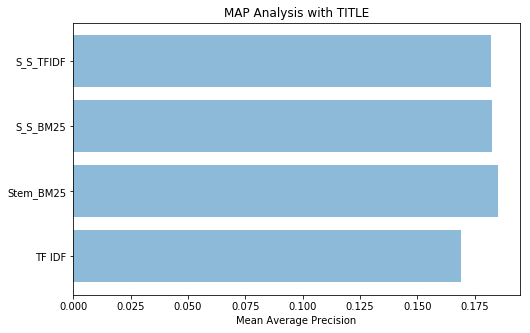

In [18]:
map_only_TF_IDF_TITLE=sum(ap_Only_TF_IDF_TITLE)/50
map_Stemmer_BM25_TITLE=sum(ap_Stemmer_BM25_TITLE)/50
map_Stoplist_Stemmer_BM25_TITLE=sum(ap_Stop_Stem_BM25_TITLE)/50
map_Stoplist_Stemmer_TF_IDF_TITLE=sum(ap_Stop_Stem_TF_IDF_TITLE)/50
y_pos=numpy.arange(4)
plt.figure(figsize=(8,5))
x=["TF IDF", "Stem_BM25","S_S_BM25", "S_S_TFIDF" ]
plt.barh(y_pos,[map_only_TF_IDF_TITLE, map_Stemmer_BM25_TITLE, map_Stoplist_Stemmer_BM25_TITLE, 
                map_Stoplist_Stemmer_TF_IDF_TITLE], align='center',alpha=0.5)
plt.yticks(y_pos, x)
plt.xlabel('Mean Average Precision')
plt.title('MAP Analysis with TITLE')
plt.savefig('map_bars_TITLE.png')



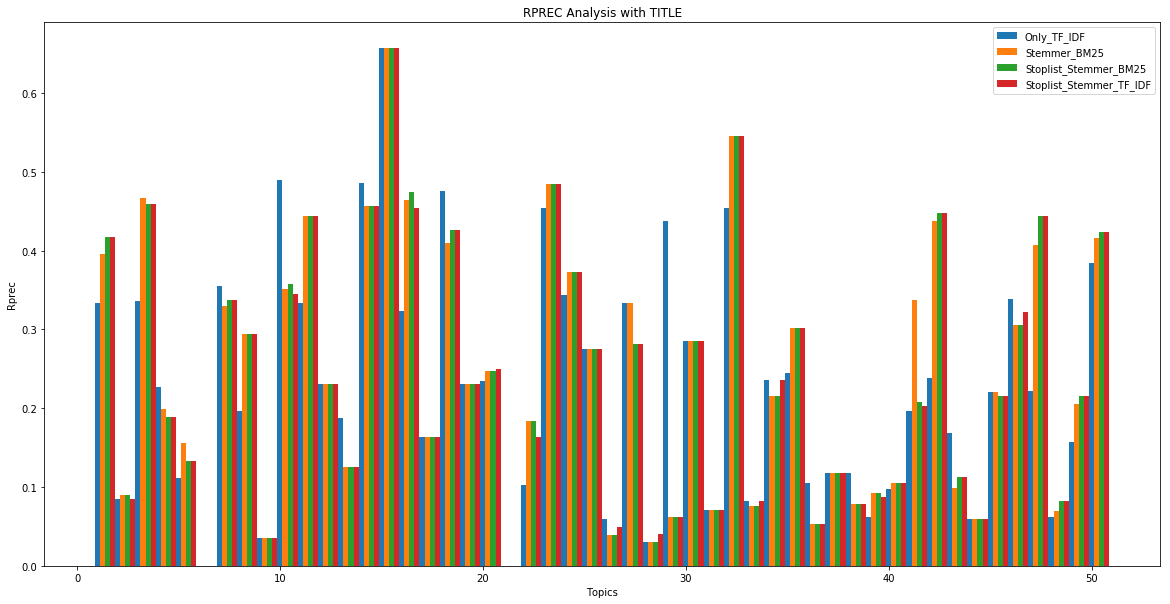

In [19]:
bins = numpy.arange(1, 51)
width=0.25
fig_rp = plt.figure(figsize=(20,10))
sub_rp = fig_rp.add_subplot(1,1,1)
sub_rp.bar(bins, rprec_Only_TF_IDF_TITLE, width, label='Only_TF_IDF')
sub_rp.bar(bins+width, rprec_Stemmer_BM25_TITLE, width, label='Stemmer_BM25')
sub_rp.bar(bins+width*2, rprec_Stop_Stem_BM25_TITLE, width, label='Stoplist_Stemmer_BM25')
sub_rp.bar(bins+width*3, rprec_Stop_Stem_TF_IDF_TITLE, width, label='Stoplist_Stemmer_TF_IDF')
plt.xlabel('Topics')
plt.ylabel('Rprec')
plt.title('RPREC Analysis with TITLE')
plt.legend()
plt.savefig('rprec_istogram_TITLE.png')

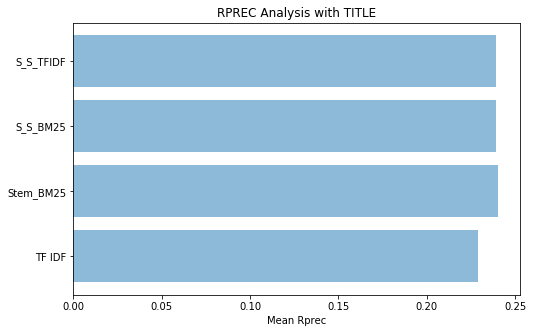

In [20]:
mrprec_only_TF_IDF_TITLE=sum(rprec_Only_TF_IDF_TITLE)/50
mrprec_Stemmer_BM25_TITLE=sum(rprec_Stemmer_BM25_TITLE)/50
mrprec_Stoplist_Stemmer_BM25_TITLE=sum(rprec_Stop_Stem_BM25_TITLE)/50
mrprec_Stoplist_Stemmer_TF_IDF_TITLE=sum(rprec_Stop_Stem_TF_IDF_TITLE)/50

y_pos=numpy.arange(4)
plt.figure(figsize=(8,5))
x=["TF IDF", "Stem_BM25","S_S_BM25", "S_S_TFIDF" ]
plt.barh(y_pos,[mrprec_only_TF_IDF_TITLE, mrprec_Stemmer_BM25_TITLE, mrprec_Stoplist_Stemmer_BM25_TITLE, 
                mrprec_Stoplist_Stemmer_TF_IDF_TITLE], align='center',alpha=0.5)
plt.yticks(y_pos, x)
plt.xlabel('Mean Rprec')
plt.title('RPREC Analysis with TITLE')
plt.savefig('rprec_bars_TITLE.png')

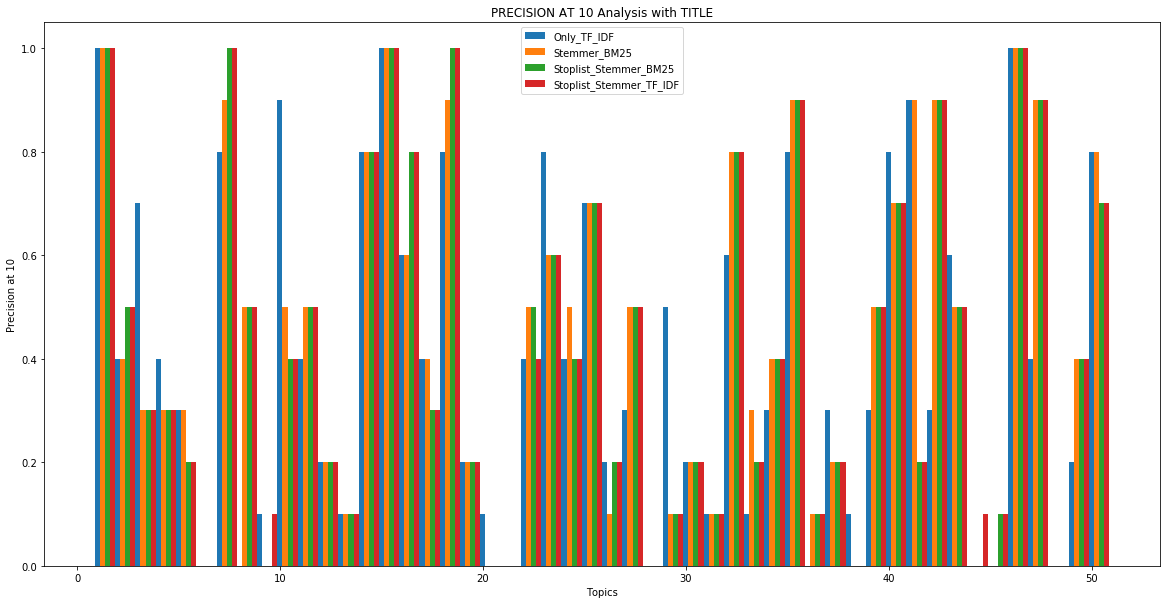

In [21]:
bins = numpy.arange(1, 51)
width=0.25
fig_p10 = plt.figure(figsize=(20,10))
sub_p10 = fig_p10.add_subplot(1,1,1)
sub_p10.bar(bins, prec10_Only_TF_IDF_TITLE, width, label='Only_TF_IDF')
sub_p10.bar(bins+width, prec10_Stemmer_BM25_TITLE, width, label='Stemmer_BM25')
sub_p10.bar(bins+width*2, prec10_Stop_Stem_BM25_TITLE, width, label='Stoplist_Stemmer_BM25')
sub_p10.bar(bins+width*3, prec10_Stop_Stem_TF_IDF_TITLE, width, label='Stoplist_Stemmer_TF_IDF')
plt.xlabel('Topics')
plt.ylabel('Precision at 10')
plt.title('PRECISION AT 10 Analysis with TITLE')
plt.legend()
plt.savefig('p10_istogram_TITLE.png')

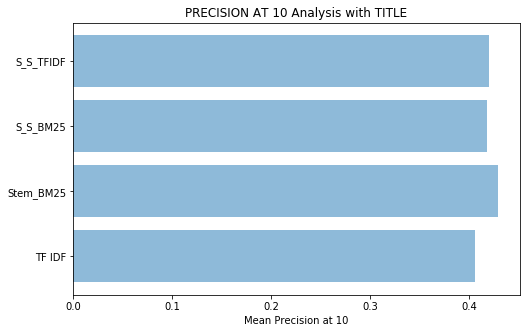

In [22]:
mprec10_only_TF_IDF_TITLE=sum(prec10_Only_TF_IDF_TITLE)/50
mprec10_Stemmer_BM25_TITLE=sum(prec10_Stemmer_BM25_TITLE)/50
mprec10_Stoplist_Stemmer_BM25_TITLE=sum(prec10_Stop_Stem_BM25_TITLE)/50
mprec10_Stoplist_Stemmer_TF_IDF_TITLE=sum(prec10_Stop_Stem_TF_IDF_TITLE)/50

y_pos=numpy.arange(4)
plt.figure(figsize=(8,5))
x=["TF IDF", "Stem_BM25","S_S_BM25", "S_S_TFIDF" ]
plt.barh(y_pos,[mprec10_only_TF_IDF_TITLE, mprec10_Stemmer_BM25_TITLE, mprec10_Stoplist_Stemmer_BM25_TITLE, 
                mprec10_Stoplist_Stemmer_TF_IDF_TITLE], align='center',alpha=0.5)
plt.yticks(y_pos, x)
plt.xlabel('Mean Precision at 10')
plt.title('PRECISION AT 10 Analysis with TITLE')
plt.savefig('p10_bars_TITLE.png')

Si mostrano i boxplots relativi ai risultati.

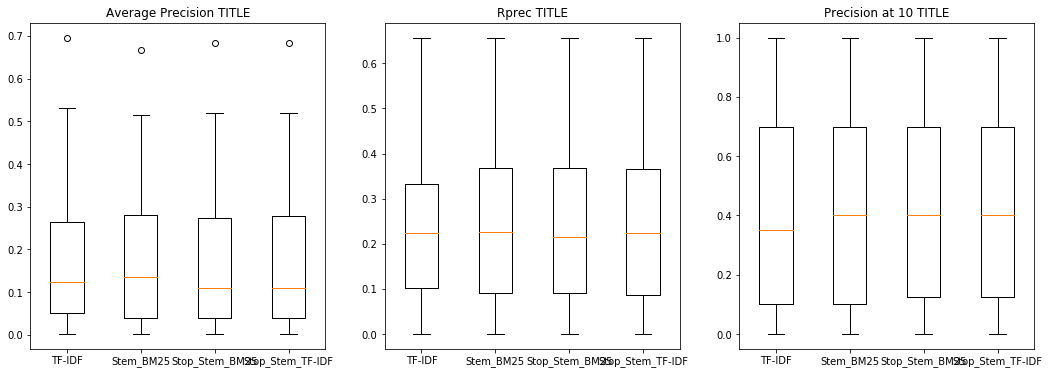

In [23]:
ap_values=[ap_Only_TF_IDF_TITLE, ap_Stemmer_BM25_TITLE, ap_Stop_Stem_BM25_TITLE, ap_Stop_Stem_TF_IDF_TITLE]
rprec_values=[rprec_Only_TF_IDF_TITLE, rprec_Stemmer_BM25_TITLE, 
              rprec_Stop_Stem_BM25_TITLE, rprec_Stop_Stem_TF_IDF_TITLE]
p10_values=[prec10_Only_TF_IDF_TITLE, prec10_Stemmer_BM25_TITLE, 
            prec10_Stop_Stem_BM25_TITLE, prec10_Stop_Stem_TF_IDF_TITLE]
lab=["TF-IDF","Stem_BM25","Stop_Stem_BM25","Stop_Stem_TF-IDF"]
fig_box = plt.figure(figsize=(18,6))
box_ap = fig_box.add_subplot(1,3,1)
box_ap.boxplot(ap_values, labels=lab)
box_ap.set_title("Average Precision TITLE")
box_rp = fig_box.add_subplot(1,3,2)
box_rp.boxplot(rprec_values, labels=lab)
box_rp.set_title("Rprec TITLE")
box_p10 = fig_box.add_subplot(1,3,3)
box_p10.boxplot(p10_values, labels=lab)
box_p10.set_title("Precision at 10 TITLE")
plt.savefig('boxplot_TITLE.png')

Viene effettuato il test ANOVA 1-way per stabilire se i valori sono coerenti tra di loro.

In [24]:
ap_F_value_TITLE, ap_P_value_TITLE=stats.f_oneway(ap_Only_TF_IDF_TITLE, ap_Stemmer_BM25_TITLE, ap_Stop_Stem_BM25_TITLE, ap_Stop_Stem_TF_IDF_TITLE)
rp_F_value_TITLE, rp_P_value_TITLE=stats.f_oneway(rprec_Only_TF_IDF_TITLE, rprec_Stemmer_BM25_TITLE, rprec_Stop_Stem_BM25_TITLE, rprec_Stop_Stem_TF_IDF_TITLE)
p10_F_value_TITLE, p10_P_value_TITLE=stats.f_oneway(prec10_Only_TF_IDF_TITLE, prec10_Stemmer_BM25_TITLE, prec10_Stop_Stem_BM25_TITLE, prec10_Stop_Stem_TF_IDF_TITLE)

print("Values", '\t\t', "Average Precision", '\t', "Rprec", '\t\t\t',"Precision at 10")
print("-------",'\t',"-----------------", '\t', "-----", '\t\t\t', "---------------")
print("F-Values", '\t', ap_F_value_TITLE, '\t', rp_F_value_TITLE, '\t',p10_F_value_TITLE)
print("P-Values", '\t', ap_P_value_TITLE, '\t', rp_P_value_TITLE, '\t',p10_P_value_TITLE)

#save results in a file
file=open("Anova_TITLE.txt","w")
file.write("ANOVA 1-way test per TITLE \n")
file.write("Values \t\t Average Precision \t Rprec \t\t\t Precision at 10 \n")
file.write("------- \t -----------------  \t -----  \t\t --------------- \n")
file.write("F-Values \t"+ str(ap_F_value_TITLE)+" \t" +str(rp_F_value_TITLE)+" \t"+str(p10_F_value_TITLE)+"\n")
file.write("P-Values \t"+str(ap_P_value_TITLE)+ "\t"+str(rp_P_value_TITLE)+ "\t"+str(p10_P_value_TITLE)+"\n")
file.close()

Values 		 Average Precision 	 Rprec 			 Precision at 10
------- 	 ----------------- 	 ----- 			 ---------------
F-Values 	 0.09809724818040028 	 0.05503481339871124 	 0.04457260749284944
P-Values 	 0.9609998253745595 	 0.982963356362875 	 0.987464448897553


Come si può notare i p-values sono tutti molto maggiori di H0=0.05, quindi le medie dei valori sono molto simili. Per confermare il risultato del test ANOVA è stato svolto il test di Tukey HSD.

In [25]:
ap_value_TITLE=numpy.concatenate((ap_Only_TF_IDF_TITLE,ap_Stemmer_BM25_TITLE,ap_Stop_Stem_BM25_TITLE,ap_Stop_Stem_TF_IDF_TITLE))
rp_value_TITLE=numpy.concatenate((rprec_Only_TF_IDF_TITLE, rprec_Stemmer_BM25_TITLE, rprec_Stop_Stem_BM25_TITLE, rprec_Stop_Stem_TF_IDF_TITLE))
p10_value_TITLE=numpy.concatenate((prec10_Only_TF_IDF_TITLE, prec10_Stemmer_BM25_TITLE, prec10_Stop_Stem_BM25_TITLE, prec10_Stop_Stem_TF_IDF_TITLE))

mc_ap_TITLE=MultiComparison(ap_value_TITLE,group)
result_ap_TITLE=mc_ap_TITLE.tukeyhsd()
print("Tukey HSD test MAP with TITLE:")
print(result_ap_TITLE)
mc_rp_TITLE=MultiComparison(rp_value_TITLE,group)
result_rp_TITLE=mc_rp_TITLE.tukeyhsd()
print("Tukey HSD test RPrec with TITLE:")
print(result_rp_TITLE)
mc_p10_TITLE=MultiComparison(p10_value_TITLE,group)
result_p10_TITLE=mc_p10_TITLE.tukeyhsd()
print("Tukey HSD test Precision at 10 with TITLE:")
print(result_p10_TITLE)

#save test results in a file
file=open("Tukey_TITLE.txt","w")
file.write("Tukey HSD test MAP:\n")
file.write(str(result_ap_TITLE)+"\n")
file.write("Tukey HSD test RPrec:\n")
file.write(str(result_rp_TITLE)+"\n")
file.write("Tukey HSD test Precision at 10:\n")
file.write(str(result_p10_TITLE)+"\n")
file.close()

Tukey HSD test MAP with TITLE:
             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------------------------------------------------
     Only TF-IDF            Stemmer BM25       0.0161  -0.0683 0.1006 False 
     Only TF-IDF       Stoplist Stemmer BM25   0.0135   -0.071 0.0979 False 
     Only TF-IDF      Stoplist Stemmer TF-IDF  0.0128  -0.0716 0.0973 False 
     Stemmer BM25      Stoplist Stemmer BM25  -0.0027  -0.0871 0.0818 False 
     Stemmer BM25     Stoplist Stemmer TF-IDF -0.0033  -0.0877 0.0812 False 
Stoplist Stemmer BM25 Stoplist Stemmer TF-IDF -0.0006  -0.0851 0.0838 False 
----------------------------------------------------------------------------
Tukey HSD test RPrec with TITLE:
             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1                 group2         meandiff  lower  upper  reject
------------

Come previsto le run hanno valori molto simili e quindi nessuna è da escludere dal top group.

## ---------------------------------------------------------------------------------------------------------------------------

### CONCLUSIONI
Si riportano le tabelle con i risultati di entrambe le prove e come si può notare, utilizzando il parametro <b>TrecQueryTags.process=TITLE,DESC</b> si ottengono i risultati migliori e anche il peggiore. In particolare le run con la rimozione delle stopwords e il Porter stemmer, con entrambi i modelli TF-IDF e BM25, sono quelle con le prestazioni migliori in assoluto. La run peggiore in assoluto è quella con Porter stemmer e modello BM25. 


In [26]:
print (tabulate([['Only TF-IDF', map_only_TF_IDF, mrprec_only_TF_IDF, mprec10_only_TF_IDF],
                ['Stemmer BM25', map_Stemmer_BM25,mrprec_Stemmer_BM25, mprec10_Stemmer_BM25],
                ['Stoplist Stemmer BM25', map_Stoplist_Stemmer_BM25, mrprec_Stoplist_Stemmer_BM25, 
                 mprec10_Stoplist_Stemmer_BM25],
                ['Stoplist Stemmer TF-IDF', map_Stoplist_Stemmer_TF_IDF,mrprec_Stoplist_Stemmer_TF_IDF, 
                 mprec10_Stoplist_Stemmer_TF_IDF]], 
               headers=['Run with TITLE,DESC', 'MAP','RPrec','P@10'], tablefmt='orgtbl'))
print()
print (tabulate([['Only TF-IDF', map_only_TF_IDF_TITLE, mrprec_only_TF_IDF_TITLE, mprec10_only_TF_IDF_TITLE],
                ['Stemmer BM25', map_Stemmer_BM25_TITLE,mrprec_Stemmer_BM25_TITLE, mprec10_Stemmer_BM25_TITLE],
                ['Stoplist Stemmer BM25', map_Stoplist_Stemmer_BM25_TITLE, mrprec_Stoplist_Stemmer_BM25_TITLE, 
                 mprec10_Stoplist_Stemmer_BM25_TITLE],
                ['Stoplist Stemmer TF-IDF', map_Stoplist_Stemmer_TF_IDF_TITLE,mrprec_Stoplist_Stemmer_TF_IDF_TITLE, 
                 mprec10_Stoplist_Stemmer_TF_IDF_TITLE]], 
               headers=['Run with TITLE', 'MAP','RPrec','P@10'], tablefmt='orgtbl'))

| Run with TITLE,DESC     |      MAP |    RPrec |   P@10 |
|-------------------------+----------+----------+--------|
| Only TF-IDF             | 0.187642 | 0.24848  |  0.426 |
| Stemmer BM25            | 0.124246 | 0.169894 |  0.302 |
| Stoplist Stemmer BM25   | 0.212204 | 0.269988 |  0.478 |
| Stoplist Stemmer TF-IDF | 0.212266 | 0.27245  |  0.478 |

| Run with TITLE          |      MAP |    RPrec |   P@10 |
|-------------------------+----------+----------+--------|
| Only TF-IDF             | 0.169292 | 0.228966 |  0.406 |
| Stemmer BM25            | 0.185426 | 0.24057  |  0.43  |
| Stoplist Stemmer BM25   | 0.18277  | 0.23911  |  0.418 |
| Stoplist Stemmer TF-IDF | 0.182134 | 0.239064 |  0.42  |


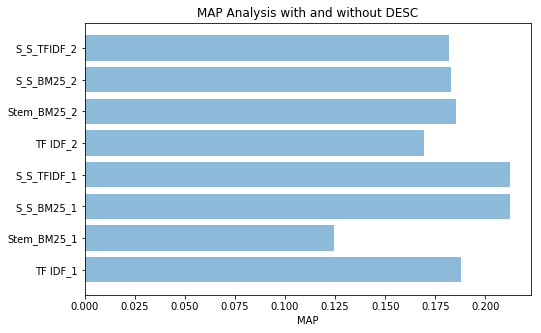

In [27]:
y_pos=numpy.arange(8)
plt.figure(figsize=(8,5))
x=["TF IDF_1", "Stem_BM25_1","S_S_BM25_1", "S_S_TFIDF_1", "TF IDF_2", "Stem_BM25_2","S_S_BM25_2", "S_S_TFIDF_2"]
plt.barh(y_pos,[map_only_TF_IDF, map_Stemmer_BM25, map_Stoplist_Stemmer_BM25, 
                map_Stoplist_Stemmer_TF_IDF,map_only_TF_IDF_TITLE, map_Stemmer_BM25_TITLE, map_Stoplist_Stemmer_BM25_TITLE, 
                map_Stoplist_Stemmer_TF_IDF_TITLE], align='center',alpha=0.5)
plt.yticks(y_pos, x)
plt.xlabel('MAP')
plt.title('MAP Analysis with and without DESC')
plt.savefig('Map_DESC_NODesc.png')